In [1]:
%load_ext autoreload
%autoreload 2

In [ ]:
import os

from pathlib import Path

import matplotlib.pyplot as plt
import motorlab as ml
import numpy as np
import sklearn

In [3]:
os.chdir(Path().resolve().parent)

In [4]:
sessions = ml.config.gbyk_sessions

In [18]:
poses = dict()

for session in sessions[:1]:
    POSES_DIR = Path("data/gbyk/") / session / "poses"
    poses_ = ml.data.load_from_memmap(POSES_DIR)
    poses_ = ml.poses.change_representation(poses_, "egocentric", "gbyk")
    poses[session] = poses_

In [22]:
poses[session][:, 8]

array([-1.1310838e-10, -1.1310838e-10, -1.1310838e-10, ...,
       -1.1310838e-10, -1.1310838e-10, -1.1310838e-10],
      shape=(162731,), dtype=float32)

In [6]:
intervals = ml.utils.get_intervals(
    data_dir="data/gbyk",
    sessions=sessions,
    experiment="gbyk",
    include_homing=True,
)

In [30]:
poses_stacked = dict()

for session, pose in poses.items():
    poses_stacked[session] = np.concatenate(
        [pose[s:e] for s, e in intervals[session]], axis=0
    )

In [57]:
y = pca.transform(poses_stacked[session])

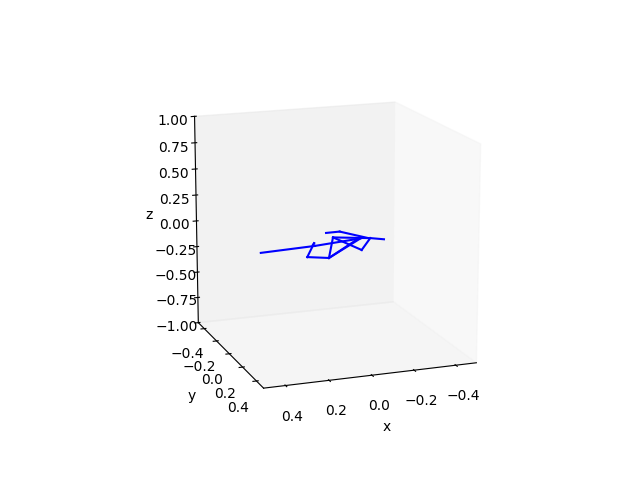

In [40]:
%matplotlib widget
component = 6  # Plot the first 5 eigenposes
n_keypoints = 21

for session, pose in poses_stacked.items():
    mean = pose.mean(axis=0)
    std = pose.std(axis=0)
    std_safe = np.where(std == 0, 1, std)
    pose = (pose - mean) / std_safe
    pca = sklearn.decomposition.PCA(n_components=pose.shape[1])
    pca.fit(pose)
    pc = pca.components_[component]  # shape: (3*n_keypoints,)
    ml.plot.poses3d(pc, experiment="gbyk", return_fig=True)
    # plt.close()
    break


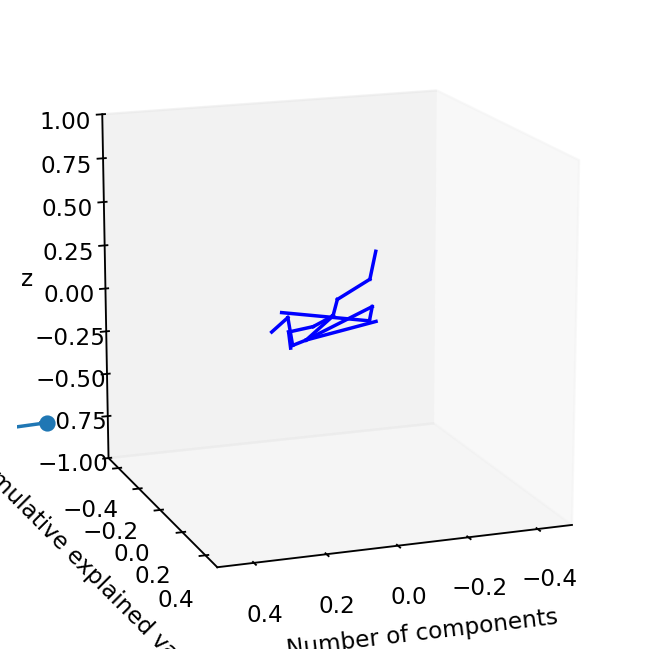

In [ ]:
%matplotlib inline
explained = pca.explained_variance_ratio_
cum_explained = explained.cumsum()

plt.plot(range(1, len(explained) + 1), cum_explained, marker="o")
plt.xlabel("Number of components")
plt.ylabel("Cumulative explained variance")
plt.show()